In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset.csv')
df.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [3]:
data=df[['Age','Blood Pressure','Cholesterol Levels','Heart Rate']]
data.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate
0,65,130,250,72
1,42,110,150,76
2,58,140,200,80
3,71,160,220,88
4,35,120,180,74


In [6]:
from sklearn.preprocessing import MinMaxScaler
s=MinMaxScaler()
scaled_data=s.fit_transform(data)

In [8]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaled_data)
pca_data

array([[ 0.31795857, -0.20811959],
       [-0.3777566 , -0.08003375],
       [ 0.23285441, -0.07125558],
       [ 0.66430267, -0.06003033],
       [-0.31089797,  0.08319334],
       [ 0.28127565, -0.08595011],
       [-0.46789114, -0.20487598],
       [-0.15776076, -0.07003228],
       [-0.0753738 ,  0.27860156],
       [-0.03983904, -0.06379453],
       [-0.25233109,  0.00454201],
       [ 0.03095254, -0.11567071],
       [ 0.13371472, -0.21079588],
       [-0.14880602, -0.05078693],
       [ 0.00826768, -0.01763945],
       [-0.12681354,  0.28251815],
       [ 0.2910021 , -0.22940347],
       [ 0.21646306, -0.32903529],
       [-0.19616277,  0.24794404],
       [ 0.17293721,  0.28724643],
       [ 0.27138978,  0.25415178],
       [ 0.66659108,  0.31139399],
       [ 0.92397415,  0.4265762 ],
       [ 0.04373051, -0.07775608],
       [-0.44158906,  0.06639859],
       [ 0.43715463, -0.11904123],
       [-0.23606472, -0.12385175],
       [-0.69528298,  0.03824275],
       [ 0.69084854,

In [10]:
data=pd.DataFrame(pca_data,columns=['A','B'])
data

,A,B
0,0.317959,-0.208120
1,-0.377757,-0.080034
2,0.232854,-0.071256
3,0.664303,-0.060030
4,-0.310898,0.083193
...,...,...
95,0.257110,0.279877
96,0.194671,-0.409006
97,-0.072690,-0.147634
98,-0.340949,0.183970


In [12]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=2)
model.fit(data)

C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [13]:
Y=model.fit_predict(data)
Y

C:\Users\SUPRATIM NAG\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [14]:
data['Cluster']=Y
data

,A,B,Cluster
0,0.317959,-0.208120,0
1,-0.377757,-0.080034,1
2,0.232854,-0.071256,0
3,0.664303,-0.060030,0
4,-0.310898,0.083193,1
...,...,...,...
95,0.257110,0.279877,0
96,0.194671,-0.409006,0
97,-0.072690,-0.147634,1
98,-0.340949,0.183970,1


In [15]:
cent=model.cluster_centers_
cent

array([[ 0.35213112, -0.01467926],
       [-0.27667445,  0.0115337 ]])

<Axes: xlabel='A', ylabel='B'>

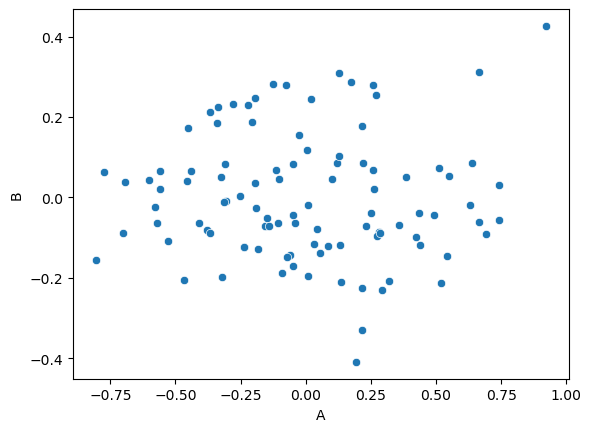

In [18]:
from collections import Counter
from matplotlib.colors import ListedColormap
import seaborn as sns
Counter(model.labels_)
Counter({1:50,0:100})
sns.scatterplot(data=data,x='A',y='B')

<Axes: xlabel='A', ylabel='B'>

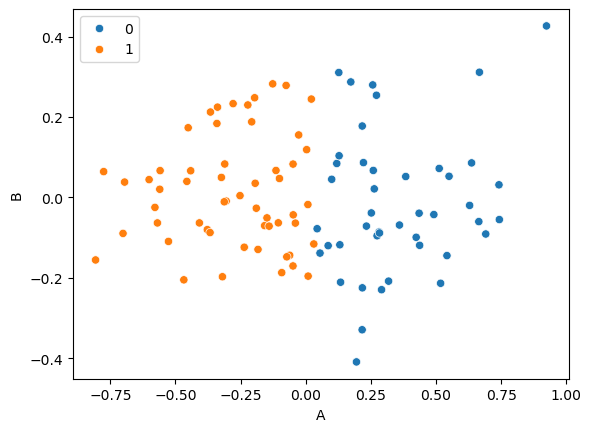

In [19]:
sns.scatterplot(data=data,x='A',y='B',hue=model.labels_)

In [23]:
labels = model.labels_

In [25]:
labels

array([0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])